In [1]:
import ipywidgets as widgets

print(widgets.__version__)

8.1.1


In [2]:
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['WineType'] = [wine.target_names[target] for target in wine.target]

ingredients = wine.feature_names

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [4]:
avg_wine_df = wine_df.groupby("WineType").mean()
avg_wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
WineType,,,,,,,,,,,,,
class_0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
class_1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
class_2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


### 1. Scatter Chart

In [11]:
color_map = { "class_0": "tomato", "class_1": "dodgerblue", "class_2": "lime"}

def create_scatter_chart(ing1, ing2, color_encode):
    with plt.style.context("fivethirtyeight"):
        fig = plt.figure(figsize=(5,5))

        if color_encode:
            for c_type in wine_df.WineType.unique():
                plt.scatter(x=wine_df[wine_df.WineType==c_type][ing1], y=wine_df[wine_df.WineType==c_type][ing2], c=color_map[c_type], edgecolors="black", s=70, label=c_type)
            plt.legend(loc="best")
        else:
            plt.scatter(x=wine_df[ing1], y=wine_df[ing2], c="dodgerblue", edgecolors="black", s=70)

        plt.xlabel(ing1.capitalize())
        plt.ylabel(ing2.capitalize())
        plt.title("{} vs {}".format(ing1[:10].capitalize(), ing2[:10].capitalize(), loc="left", fontsize=15, fontweight="light"))
        plt.show()


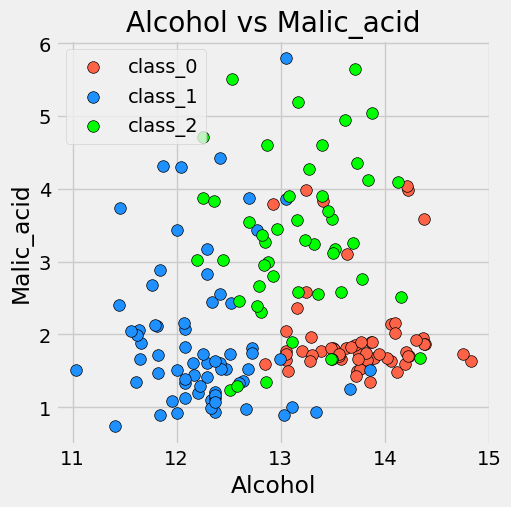

In [14]:
create_scatter_chart("alcohol", "malic_acid", True)

In [15]:
drop1 = widgets.Dropdown(description="X-Axis", options=ingredients, index=0, layout=widgets.Layout(width="220px"))
drop2 = widgets.Dropdown(description="Y-Axis", options=ingredients, index=0, layout=widgets.Layout(width="200px"))
color_encode = widgets.Checkbox(description="Color_Encode")

In [17]:
scatter_chart = widgets.interactive_output(create_scatter_chart, { "ing1": drop1, "ing2": drop2, "color_encode": color_encode})

type(scatter_chart)

ipywidgets.widgets.widget_output.Output

In [18]:
widgets.VBox([widgets.HBox([drop1, drop2]), color_encode, scatter_chart])

### 2. Bar Chart

In [19]:
def create_bar_chart(ingredients):
    with plt.style.context("fivethirtyeight"):
        avg_wine_df.plot.bar(y=list(ingredients), stacked=True, figsize= (5, 4.5), ylabel="Avg. Value")
        plt.title("Avg. Ingredients Per Wine Type", loc="left", fontsize=15, fontweight="bold", pad=10)
        plt.xticks(rotation=45)
        plt.show()

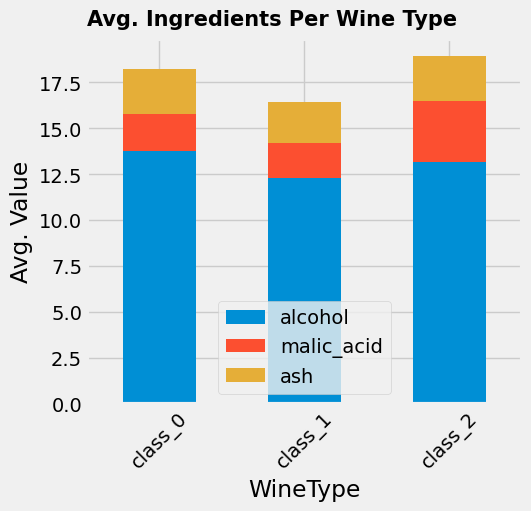

In [20]:
create_bar_chart(["alcohol", "malic_acid", "ash"])

In [21]:
layout = widgets.Layout(width="auto")
multi_select = widgets.SelectMultiple(options=ingredients, index=[0, 1, 2], rows=4, layout=layout)
multi_select

SelectMultiple(index=(0, 1, 2), layout=Layout(width='auto'), options=('alcohol', 'malic_acid', 'ash', 'alcalin…

In [22]:
bar_chart = widgets.interactive_output(create_bar_chart, {"ingredients": multi_select})

type(bar_chart)

ipywidgets.widgets.widget_output.Output

In [23]:
widgets.VBox([multi_select, bar_chart])

### Final Dashboard

In [24]:
col1 = widgets.VBox([widgets.HBox([drop1, drop2]), color_encode, scatter_chart])
col2 = widgets.VBox([multi_select, bar_chart])

title = widgets.HTML("<h1 style='text-align:center; padding: 10px; color:tomato;'>Wine Dataset Analysis</h1>")

widgets.VBox([title, widgets.HBox([col1, col2])])